# Which provides a better financial position by age 30: going to CU Boulder or CSU Fort Collins for a bachelor's in data science?
# I will assume that the cost/benefit of scholarships, jobs in school, living expenses after college, etc. is negligible.
# The variables that will be measured will include salary in entry-level and mid-level positions and when you enter a mid-level position.
# I will also measure cost of attendance, but as a unit.

Average financial position after going to CU Boulder: 964522.8809085109
Average financial position after going to CSU Fort Collins: 1081295.5459915793


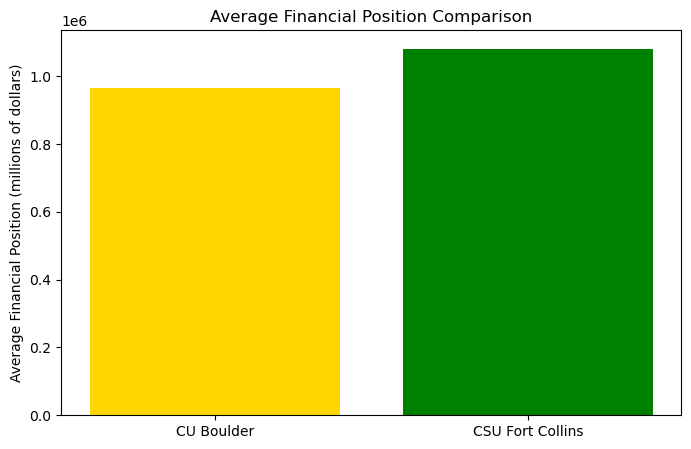

In [9]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns

cu_boulder_acceptance_rate = 0.811
csu_fort_collins_acceptance_rate = 0.886

cu_boulder_cost_of_attendance = 137240
csu_fort_collins_cost_of_attendance = 138736

entry_level_average_salary = 116456
mid_level_average_salary = 130251
average_transition_time = 3 # Years to enter mid-level after working entry-level

total_financial_position_cu_boulder = 0
total_financial_position_csu_fort_collins = 0

trials = 100

def roll_three_die():
    return rand.uniform(0.9, 1.1) * rand.uniform(0.9, 1.1) * rand.uniform(0.9, 1.1)

for _ in range(trials): # CU Boulder preference
    if rand.random() < cu_boulder_acceptance_rate:
        total_financial_position_cu_boulder += cu_boulder_cost_of_attendance * roll_three_die()
        transition_time = average_transition_time * roll_three_die()
        entry_level_salary = entry_level_average_salary * roll_three_die()
        mid_level_salary = mid_level_average_salary * roll_three_die()
        total_financial_position_cu_boulder += (entry_level_salary * transition_time) + (mid_level_salary * (9 - transition_time))
    else:
        pass # Assume you explode after not being accepted into CU Boulder

for _ in range(trials): # CSU Fort Collins preference
    if rand.random() < csu_fort_collins_acceptance_rate:
        total_financial_position_csu_fort_collins += csu_fort_collins_cost_of_attendance * roll_three_die()
        transition_time = average_transition_time * roll_three_die()
        entry_level_salary = entry_level_average_salary * roll_three_die()
        mid_level_salary = mid_level_average_salary * roll_three_die()
        total_financial_position_csu_fort_collins += (entry_level_salary * transition_time) + (mid_level_salary * (9 - transition_time))
    else:
        pass # Assume you explode after not being accepted into CSU Fort Collins

average_financial_position_cu_boulder = total_financial_position_cu_boulder / trials
average_financial_position_csu_fort_collins = total_financial_position_csu_fort_collins / trials
print("Average financial position after going to CU Boulder:", average_financial_position_cu_boulder)
print("Average financial position after going to CSU Fort Collins:", average_financial_position_csu_fort_collins)

averages = [average_financial_position_cu_boulder, average_financial_position_csu_fort_collins]
labels = ['CU Boulder', 'CSU Fort Collins']

plt.figure(figsize=(8,5))
plt.bar(labels, averages, color=['gold', 'green'])
plt.ylabel('Average Financial Position (millions of dollars)')
plt.title('Average Financial Position Comparison')
plt.show()

# Conclusion: Going to CSU Fort Collins provides a better average financial position for a bachelor's in data science than CU Boulder.
# This is likely due to CSU Fort Collins' higher acceptance rate, which means a higher chance of a guaranteed job.
# Even though its cost of attendance is higher, this comes with a job later in life, so it is worth it.
# If you try to get into CU Boulder, fail, and explode, you will make no money and be worse off.